Link to where I found the data:

https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency

# About the dataset

The dataset contains information about a group of test subjects and their sleep patterns. 
Each test subject is identified by:
-  ID (unique)
-  Age 
-  Gender 
-  Bedtime - when each subject goes to bed each day
-  Wakeup time - when each subject wakes up each day
-  Sleep duration - total amount of time each subject slept in hours
-  Sleep efficiency - measure of the proportion of time spent in bed that is actually spent asleep
-  REM sleep percentage - the amount of time each subject spent in REM stage
-  Deep sleep percentage - the amount of time each subject spent in Deep Sleep stage
-  Light sleep percentage - the amount of time each subject spent in Light Sleep stage
-  Awakenings - the number of times each subject wakes up during the night
-  Caffeine consumption - in the 24 hours prior to bedtime
-  Alcohol consumption - in the 24 hours prior to bedtime
-  Smoking status
-  Exercise frequency

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sleep_df = pd.read_csv('Sleep_Efficiency.csv') 

sleep_df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


# Cleaning Data

In [3]:
sleep_df.columns = sleep_df.columns.str.lower().str.replace(' ', '_')

sleep_df.head()

,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [4]:
# Checking NaN Values

sleep_df.isna().sum()

id                         0
age                        0
gender                     0
bedtime                    0
wakeup_time                0
sleep_duration             0
sleep_efficiency           0
rem_sleep_percentage       0
deep_sleep_percentage      0
light_sleep_percentage     0
awakenings                20
caffeine_consumption      25
alcohol_consumption       14
smoking_status             0
exercise_frequency         6
dtype: int64

The output indicates that there are missing values in awakenings, caffeine_consumption, alcohol_consumption column.

In [5]:
# Checking duplicates

duplicates = sleep_df.duplicated()

duplicates_df = sleep_df[duplicates]
print(duplicates_df)

Empty DataFrame
Columns: [id, age, gender, bedtime, wakeup_time, sleep_duration, sleep_efficiency, rem_sleep_percentage, deep_sleep_percentage, light_sleep_percentage, awakenings, caffeine_consumption, alcohol_consumption, smoking_status, exercise_frequency]
Index: []


In [6]:
# Removing ID column

sleep_df = sleep_df.drop(['id'], axis=1)

In [7]:
# Converting bedtime and wakeup_time to datetime

sleep_df['bedtime'] = pd.to_datetime(sleep_df['bedtime'])
sleep_df['wakeup_time'] = pd.to_datetime(sleep_df['wakeup_time'])

In [8]:
# Splitting into Categorical and Numerical

categorical = sleep_df.select_dtypes(include=object)
numerical = sleep_df.select_dtypes(include=np.number)

# Wrangling Data

In [9]:
# Checking unique values of columns

sleep_df.nunique()

age                        61
gender                      2
bedtime                   424
wakeup_time               434
sleep_duration              9
sleep_efficiency           50
rem_sleep_percentage       13
deep_sleep_percentage      29
light_sleep_percentage     29
awakenings                  5
caffeine_consumption        6
alcohol_consumption         6
smoking_status              2
exercise_frequency          6
dtype: int64

In [10]:
for col in sleep_df.columns:
    vals = sleep_df[col].unique()
    print(f"Unique values in '{col}':\n{vals}\n")

Unique values in 'age':
[65 69 40 57 36 27 53 41 11 50 55 30 28 32 21 43 52 24 29 63 35 23 47 18
 26 37 46 61 38 20 58 31 34  9 16 54 56 25 44 66 48 45 39 51 22 15 19 33
 42 68 14 49 62 64 59 10 13 60 67 17 12]

Unique values in 'gender':
['Female' 'Male']

Unique values in 'bedtime':
<DatetimeArray>
['2021-03-06 01:00:00', '2021-12-05 02:00:00', '2021-05-25 21:30:00',
 '2021-11-03 02:30:00', '2021-03-13 01:00:00', '2021-07-01 21:00:00',
 '2021-07-21 21:00:00', '2021-08-16 00:30:00', '2021-04-05 02:30:00',
 '2021-09-16 01:00:00',
 ...
 '2021-02-06 21:00:00', '2021-02-06 01:30:00', '2021-09-05 02:00:00',
 '2021-11-16 23:00:00', '2021-04-21 00:00:00', '2021-11-13 22:00:00',
 '2021-03-31 21:00:00', '2021-09-07 23:00:00', '2021-07-29 21:00:00',
 '2021-03-17 02:30:00']
Length: 424, dtype: datetime64[ns]

Unique values in 'wakeup_time':
<DatetimeArray>
['2021-03-06 07:00:00', '2021-12-05 09:00:00', '2021-05-25 05:30:00',
 '2021-11-03 08:30:00', '2021-03-13 09:00:00', '2021-07-01 04:30:00',
 

In [11]:
# I decided to replace the missing values with 0

sleep_df['exercise_frequency'].fillna(0, inplace=True)
sleep_df['alcohol_consumption'].fillna(0, inplace=True)
sleep_df['caffeine_consumption'].fillna(0, inplace=True)
sleep_df['awakenings'].fillna(0, inplace=True)

In [12]:
# Checking datatypes

sleep_df.dtypes

age                                int64
gender                            object
bedtime                   datetime64[ns]
wakeup_time               datetime64[ns]
sleep_duration                   float64
sleep_efficiency                 float64
rem_sleep_percentage               int64
deep_sleep_percentage              int64
light_sleep_percentage             int64
awakenings                       float64
caffeine_consumption             float64
alcohol_consumption              float64
smoking_status                    object
exercise_frequency               float64
dtype: object

# EDA

In [13]:
# Checking head, shape and info

sleep_df.head()

,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [14]:
sleep_df.shape

(452, 14)

In [15]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   age                     452 non-null    int64         
 1   gender                  452 non-null    object        
 2   bedtime                 452 non-null    datetime64[ns]
 3   wakeup_time             452 non-null    datetime64[ns]
 4   sleep_duration          452 non-null    float64       
 5   sleep_efficiency        452 non-null    float64       
 6   rem_sleep_percentage    452 non-null    int64         
 7   deep_sleep_percentage   452 non-null    int64         
 8   light_sleep_percentage  452 non-null    int64         
 9   awakenings              452 non-null    float64       
 10  caffeine_consumption    452 non-null    float64       
 11  alcohol_consumption     452 non-null    float64       
 12  smoking_status          452 non-null    object    

In [16]:
sleep_df.describe().T

,count,mean,min,25%,50%,75%,max,std
age,452.0,40.285398,9.0,29.0,40.0,52.0,69.0,13.17225
bedtime,452,2021-07-13 00:03:39.026548480,2021-01-03 00:30:00,2021-04-14 01:07:30,2021-07-20 23:30:00,2021-10-11 05:22:30,2021-12-31 21:00:00,NaN
wakeup_time,452,2021-07-12 20:19:22.831858176,2021-01-03 08:30:00,2021-04-14 07:52:30,2021-07-20 16:00:00,2021-10-11 05:52:30,2021-12-31 06:30:00,NaN
sleep_duration,452.0,7.465708,5.0,7.0,7.5,8.0,10.0,0.866625
sleep_efficiency,452.0,0.788916,0.5,0.6975,0.82,0.9,0.99,0.135237
rem_sleep_percentage,452.0,22.615044,15.0,20.0,22.0,25.0,30.0,3.525963
deep_sleep_percentage,452.0,52.823009,18.0,48.25,58.0,63.0,75.0,15.654235
light_sleep_percentage,452.0,24.561947,7.0,15.0,18.0,32.5,63.0,15.313665
awakenings,452.0,1.568584,0.0,0.0,1.0,3.0,4.0,1.368698
caffeine_consumption,452.0,22.345133,0.0,0.0,0.0,50.0,200.0,29.848626


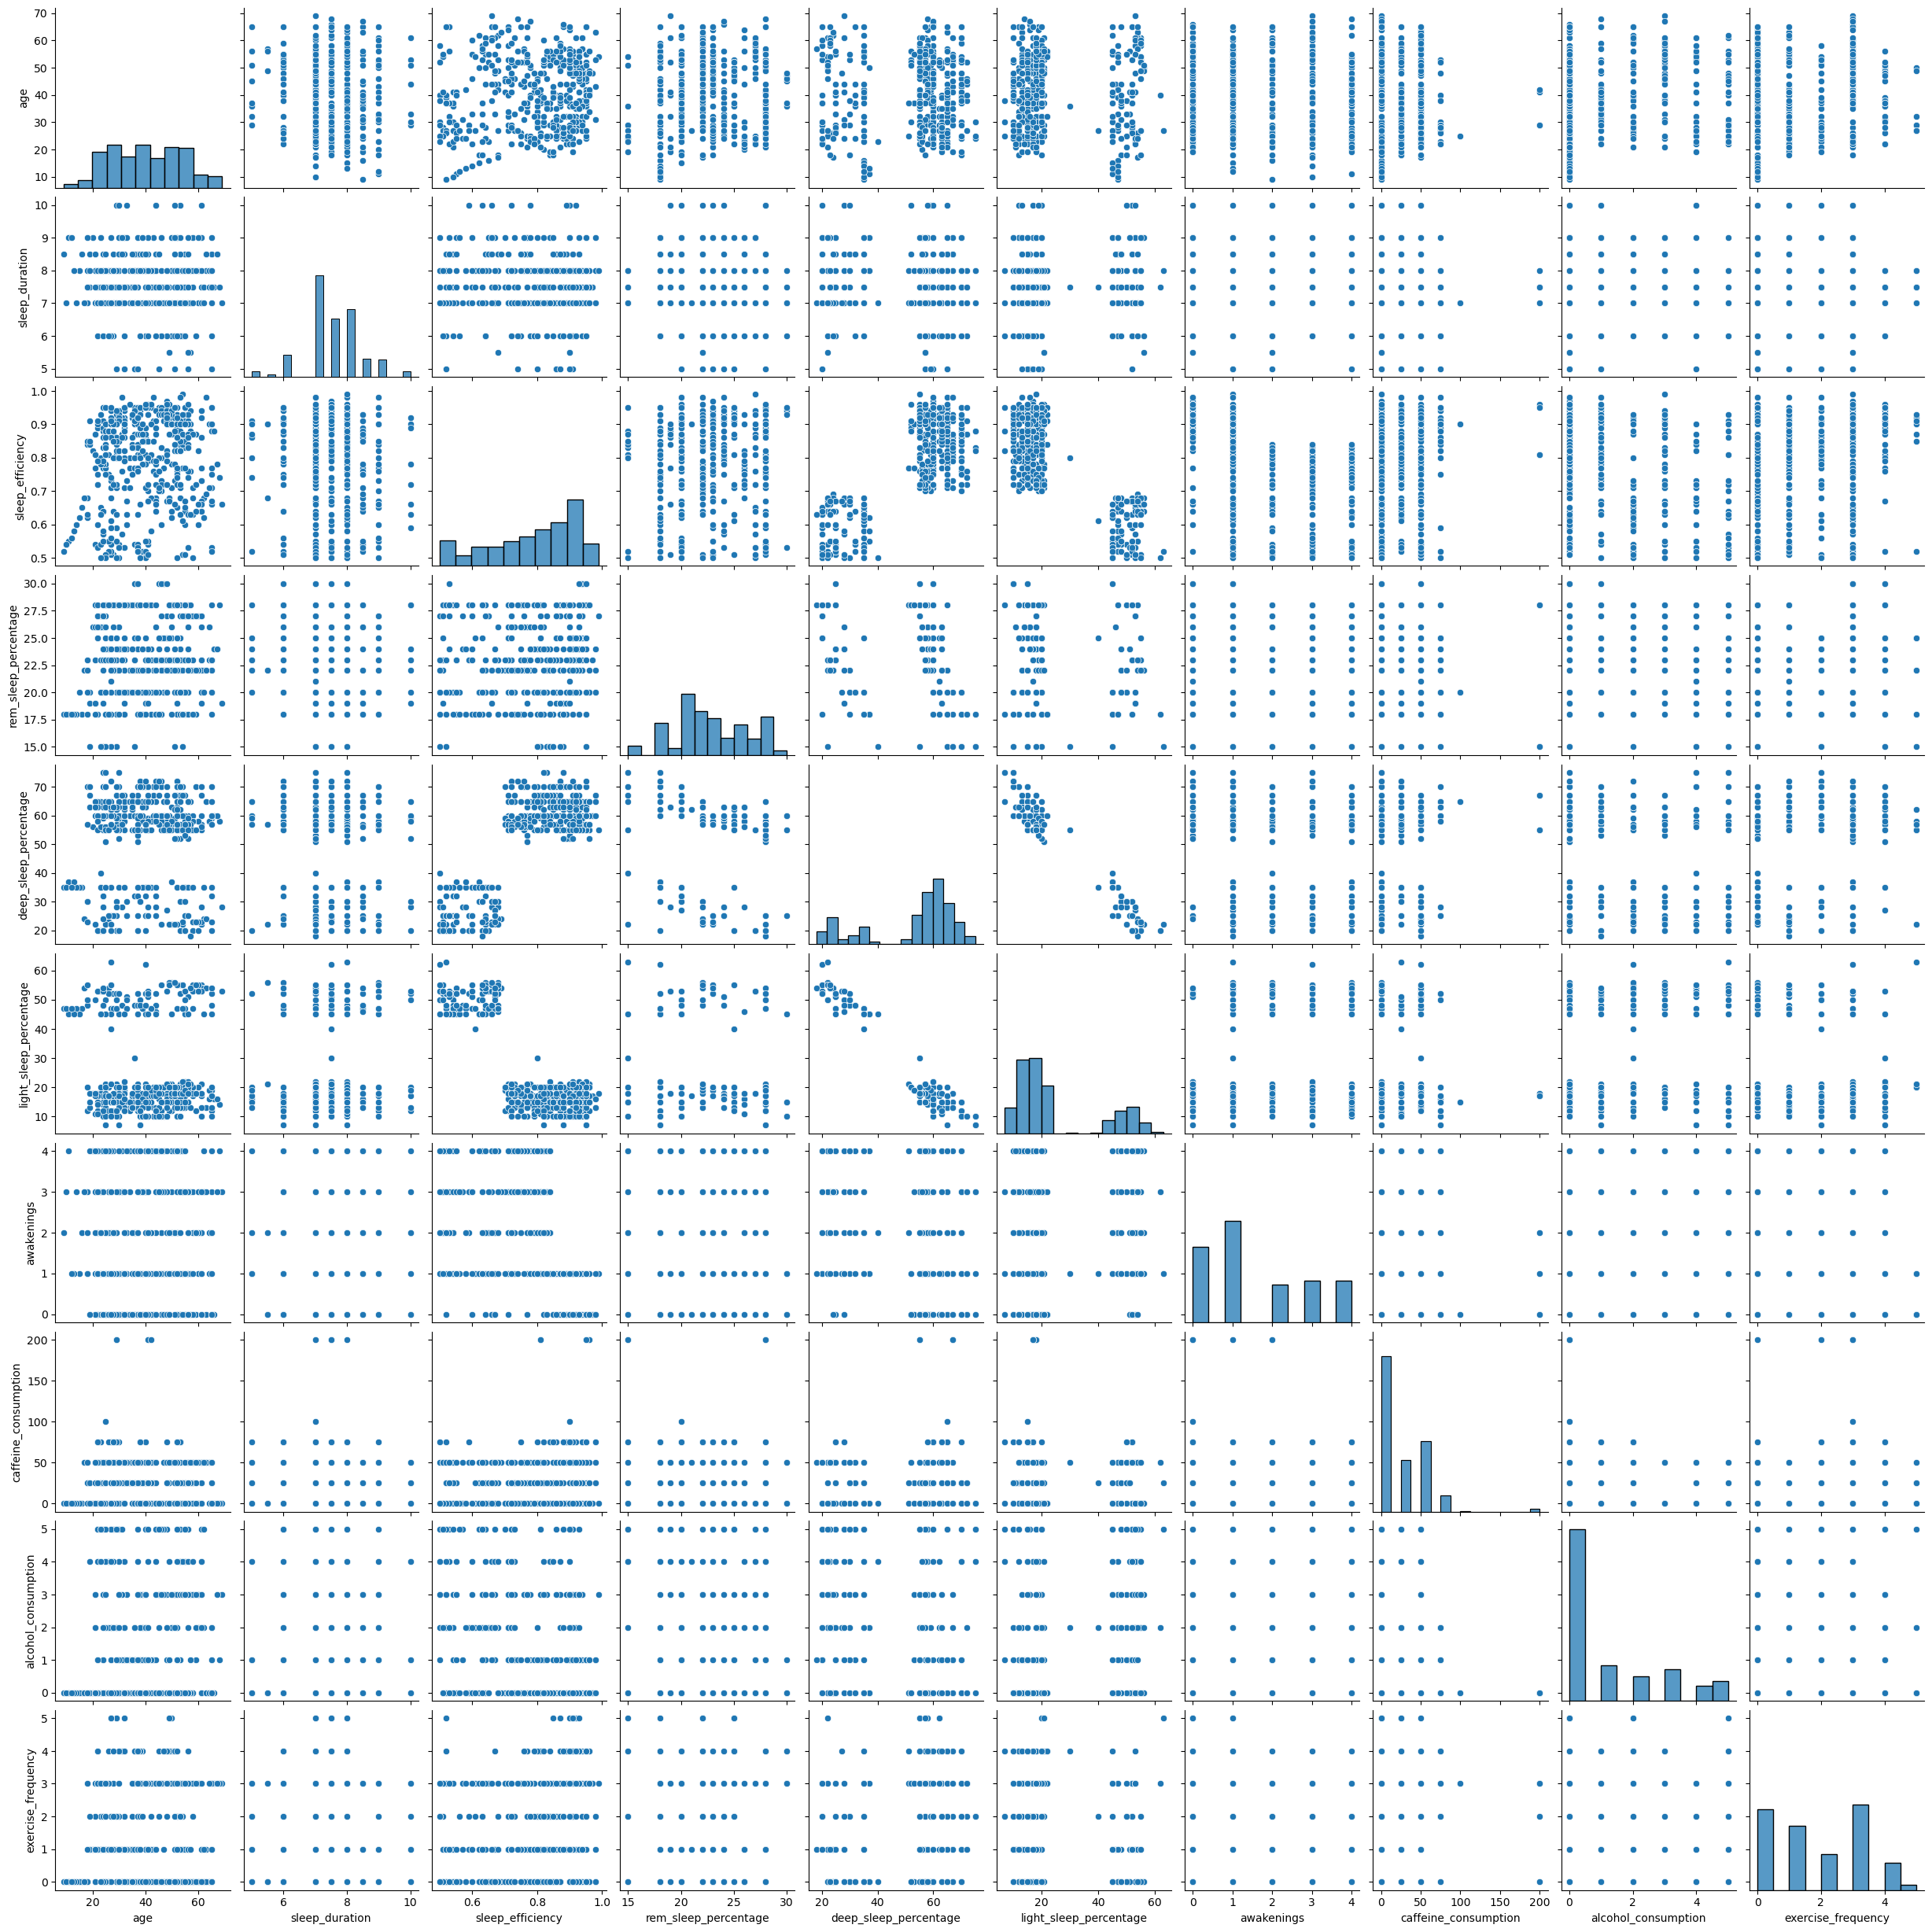

In [17]:
# Plotting all columns

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    sns.pairplot(sleep_df, size=2.5)
    plt.show()

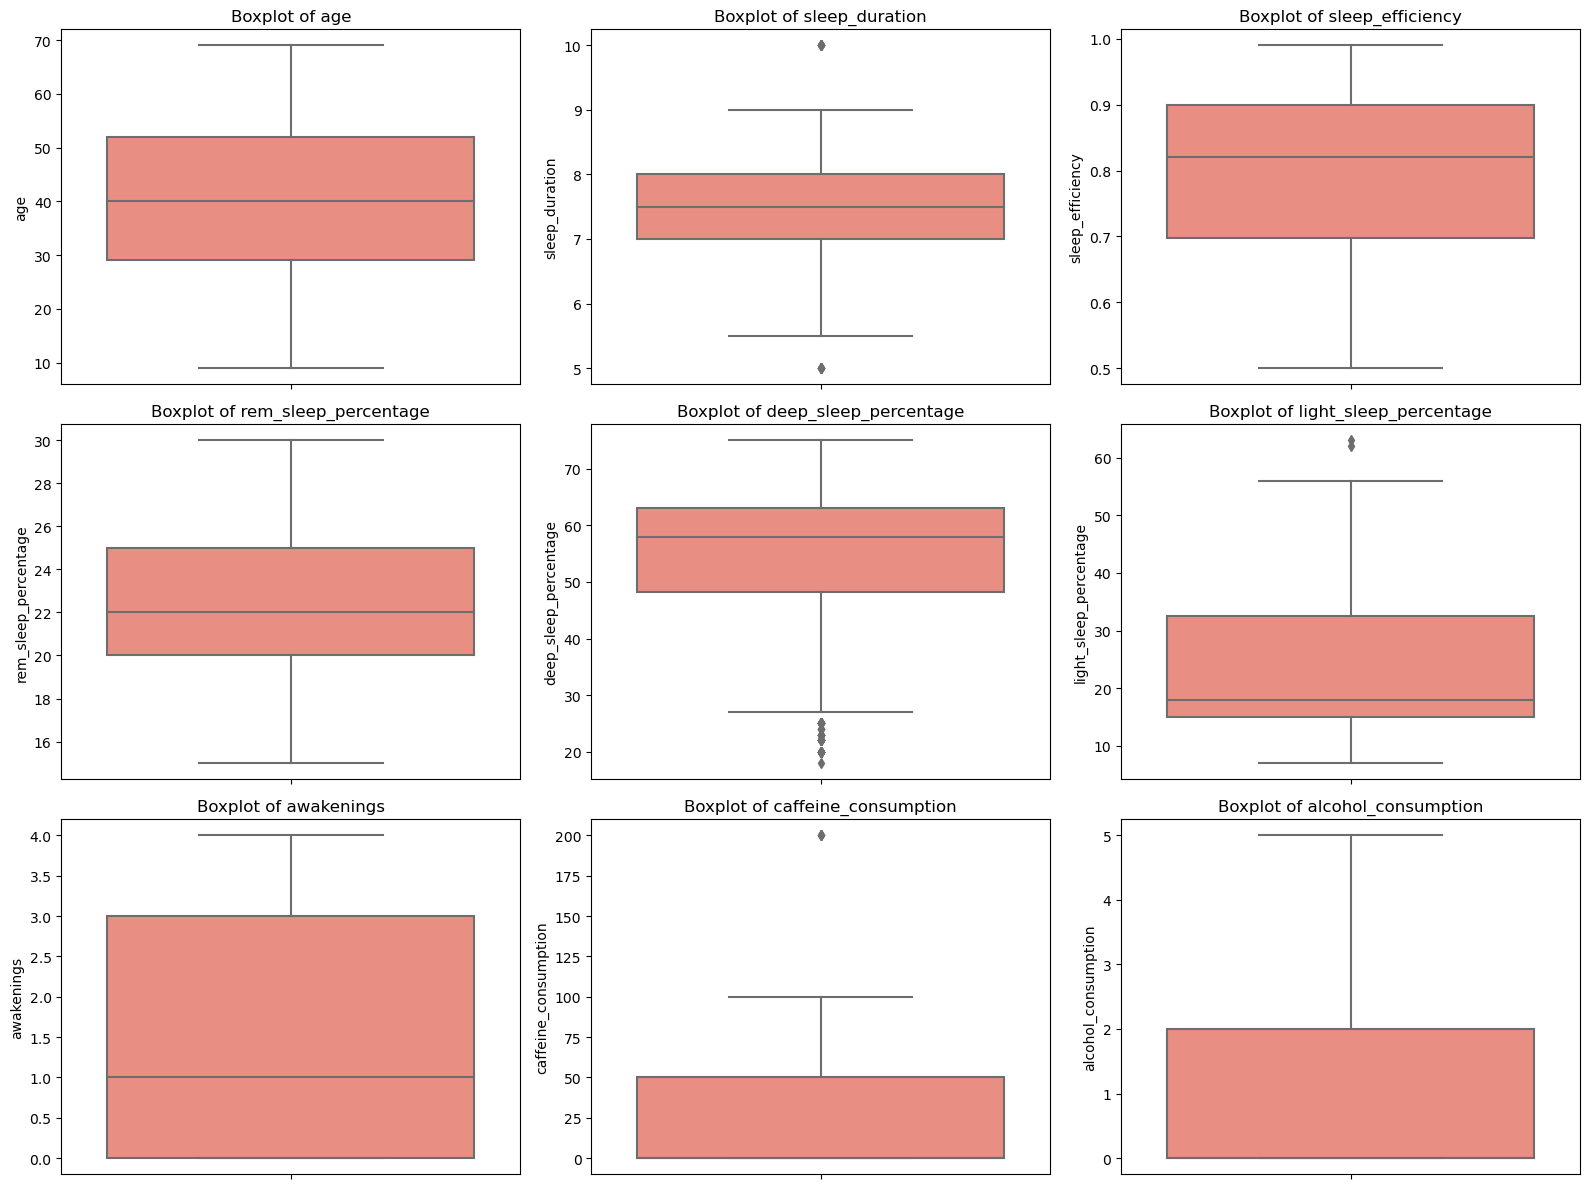

In [18]:
# Checking for outliers

numerical_columns = ['age', 'sleep_duration', 'sleep_efficiency', 'rem_sleep_percentage', 'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings', 'caffeine_consumption', 'alcohol_consumption']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=sleep_df[col], color='salmon')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

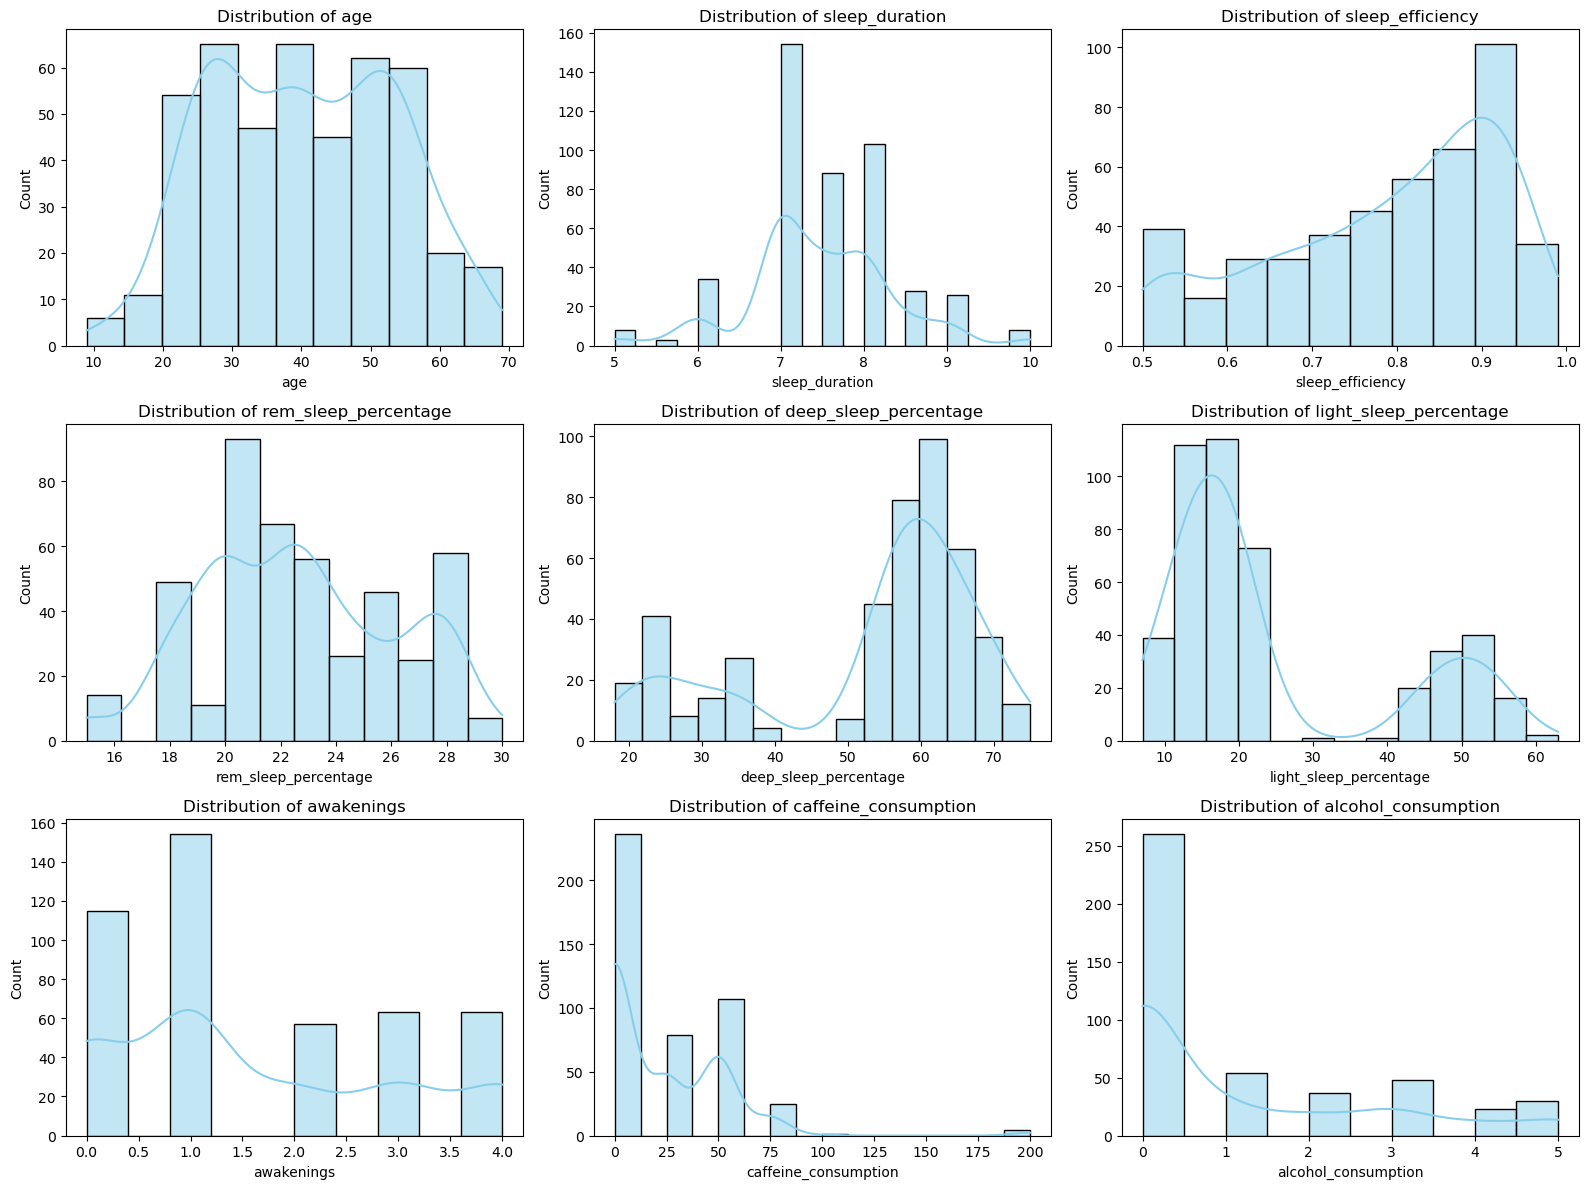

In [19]:
# checking distributions of numerical columns 

numerical_columns_subset = numerical_columns[:9]

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns_subset):
    plt.subplot(3, 3, i + 1)
    sns.histplot(sleep_df[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

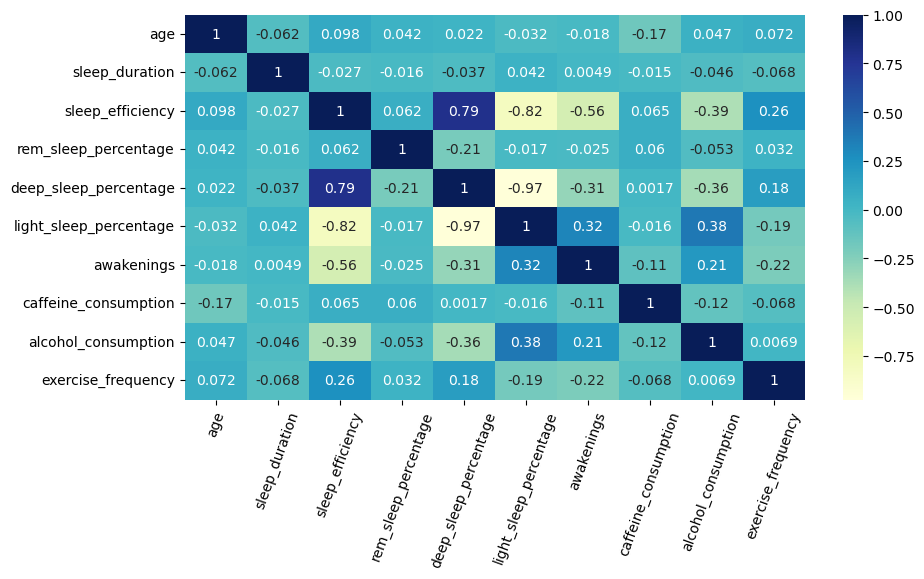

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
heatmap = sns.heatmap(numerical.corr(), annot=True, cmap='YlGnBu')

for item in heatmap.get_xticklabels():
    item.set_rotation(70)

plt.show()

In [21]:
numerical_columns = sleep_df.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = sleep_df[numerical_columns].corr()

print(correlation_matrix)

                             age  sleep_duration  sleep_efficiency  \
age                     1.000000       -0.062462          0.098357   
sleep_duration         -0.062462        1.000000         -0.027467   
sleep_efficiency        0.098357       -0.027467          1.000000   
rem_sleep_percentage    0.042091       -0.015940          0.062362   
deep_sleep_percentage   0.021730       -0.037304          0.787335   
light_sleep_percentage -0.031905        0.041804         -0.819204   
awakenings             -0.015170       -0.009696         -0.538352   
caffeine_consumption   -0.148925       -0.009956          0.065750   
alcohol_consumption     0.052238       -0.044325         -0.381249   
exercise_frequency      0.080558       -0.074256          0.257436   

                        rem_sleep_percentage  deep_sleep_percentage  \
age                                 0.042091               0.021730   
sleep_duration                     -0.015940              -0.037304   
sleep_efficiency

 Findings:

        Sleep Efficiency and Sleep Duration:
        There is a negative correlation (-0.074) between sleep duration and sleep efficiency. This suggests that as sleep duration increases, sleep efficiency tends to decrease slightly.

    Sleep Efficiency and Deep Sleep Percentage:
        There is a positive correlation (0.787) between sleep efficiency and deep sleep percentage. Higher sleep efficiency is associated with a higher percentage of deep sleep.

    Light Sleep Percentage and Sleep Efficiency:
        There is a strong negative correlation (-0.819) between light sleep percentage and sleep efficiency. Higher sleep efficiency is associated with a lower percentage of light sleep.

    Awakenings and Sleep Efficiency:
        There is a moderate negative correlation (-0.538) between awakenings and sleep efficiency. Higher awakenings are associated with lower sleep efficiency.

    Deep Sleep Percentage and Light Sleep Percentage:
        There is a strong negative correlation (-0.974) between deep sleep percentage and light sleep percentage. As one increases, the other decreases significantly.

    Awakenings and Light Sleep Percentage:
        There is a positive correlation (0.293) between awakenings and light sleep percentage. More awakenings are associated with a higher percentage of light sleep.

    Exercise Frequency and Sleep Efficiency:
        There is a positive correlation (0.257) between exercise frequency and sleep efficiency. Higher exercise frequency is associated with higher sleep efficiency.

    Alcohol Consumption and Deep Sleep Percentage:
        There is a negative correlation (-0.356) between alcohol consumption and deep sleep percentage. Higher alcohol consumption is associated with a lower percentage of deep sleep.


It's important to note that correlation does not imply causation, and there may be other factors influencing these relationships.

#

# What Is Sleep Quality?

You might be getting enough hours, but that doesn’t necessarily mean you’re getting the most restful type of sleep. 

When it comes to sleep, quantity is important—but so is quality. Most adults need somewhere between seven and nine hours a night to wake up feeling well-rested, but a lot depends on exactly what happens during those hours.

- Sleep efficiency:   The amount of time you spend actually sleeping while in bed. This measurement should ideally be 85% or more for optimal health benefits. 

- Light sleep:  Adults spend around 50% of their total sleep time in light sleep stages.
    
- Deep sleep:   Stage where the most restorative sleep is happening. This is when tissue growth and repair take place, important hormones are released, memories are consolidated, the immune system and cellular energy are restored and the brain detoxifies You should aim for about 13% to 23% of your sleep to be in these stage.

- REM:   Stage when you are most likely to dream, is believed to be essential to cognitive functions such as memory, learning, and creativity You should spend about 20-25% of your sleep in REM.
    
- Sleep waking:   Frequent wakefulness at night can disrupt your sleep cycle and reduce your sleep quality. Waking up once or not at all suggests that your sleep quality is good.

    (https://www.thensf.org/what-is-sleep-quality/)
    (https://www.sleepfoundation.org/stages-of-sleep/deep-sleep)
    (https://www.texashealth.org/areyouawellbeing/Health-and-Well-Being/How-Much-Deep-Light-and-REM-Sleep-Do-You-Need)

In [22]:
# Creating a sleep quality category based on informations above and criterias from the table:

df = sleep_df.copy()

# Sleep Duration -  7 hours or more 
df['sd_grade'] = [int(x >= 7) for x in df['sleep_duration']]

# Sleep Efficiency - ideally 85% or more
df['se_grade'] = [int(x >= 0.85) for x in df['sleep_efficiency']]

# Light Sleep - around 50%
df['ls_grade'] = [int((x >= 45 and x <= 55)) for x in df['light_sleep_percentage']]

# Deep Sleep - between 13% and 23% 
df['deep_sleep_grade'] = [int((x >= 13 and x <= 23)) for x in df['deep_sleep_percentage']]

# REM - between 20% and 25% 
df['rem_grade'] = [int((x >= 20 and x <= 25)) for x in df['rem_sleep_percentage']]

# Awakenings - 1 or less
df['aw_grade'] = [int(x <= 1) for x in df['awakenings']]

# new Sleep quality column:
sleep_df['sleep_quality'] = df['sd_grade'] + df['se_grade'] + df['ls_grade'] + df['deep_sleep_grade'] + df['rem_grade'] + df['aw_grade']

sleep_df

,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency,sleep_quality
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,2
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,2
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,4
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,2
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0,4
448,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0,0
449,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,0.0,3.0,Yes,0.0,4
450,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0,1


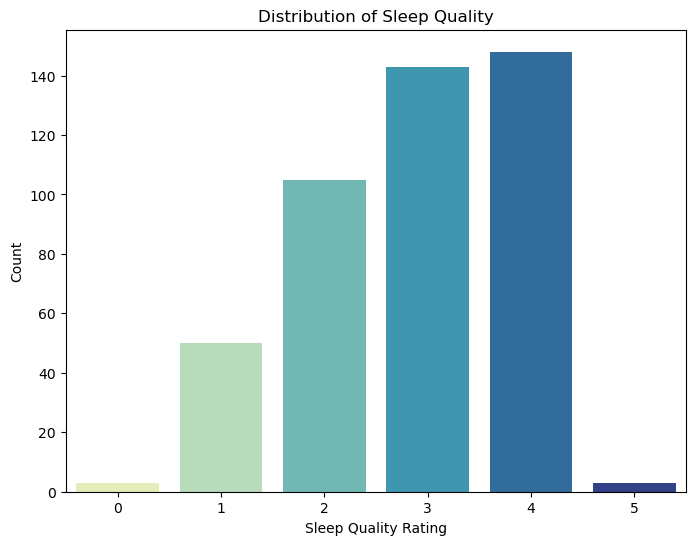

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='sleep_quality', data=sleep_df, palette='YlGnBu')
plt.title('Distribution of Sleep Quality')
plt.xlabel('Sleep Quality Rating')
plt.ylabel('Count')
plt.show()

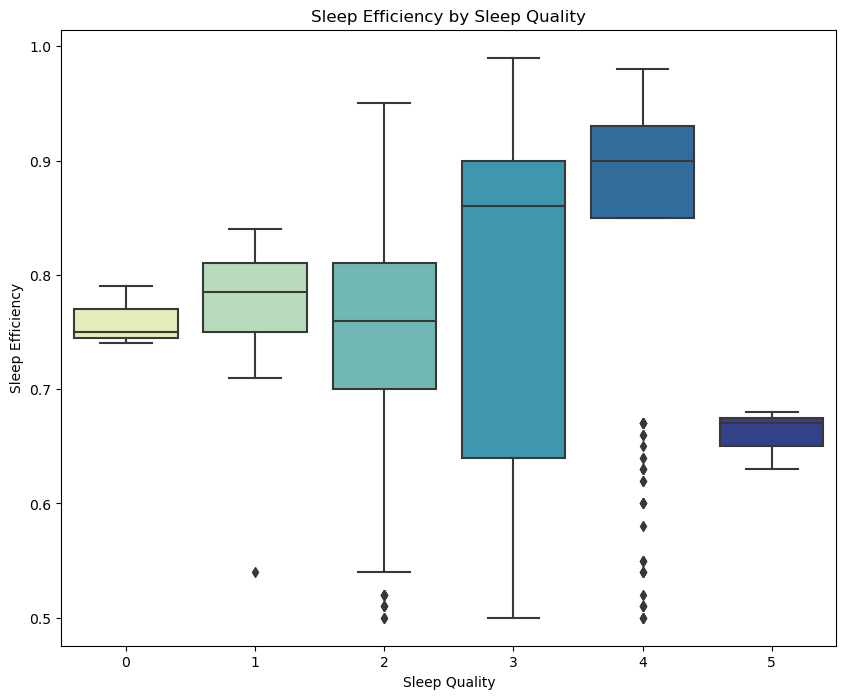

In [24]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='sleep_quality', y='sleep_efficiency', data=sleep_df, palette='YlGnBu')
plt.title('Sleep Efficiency by Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Sleep Efficiency')
plt.show()

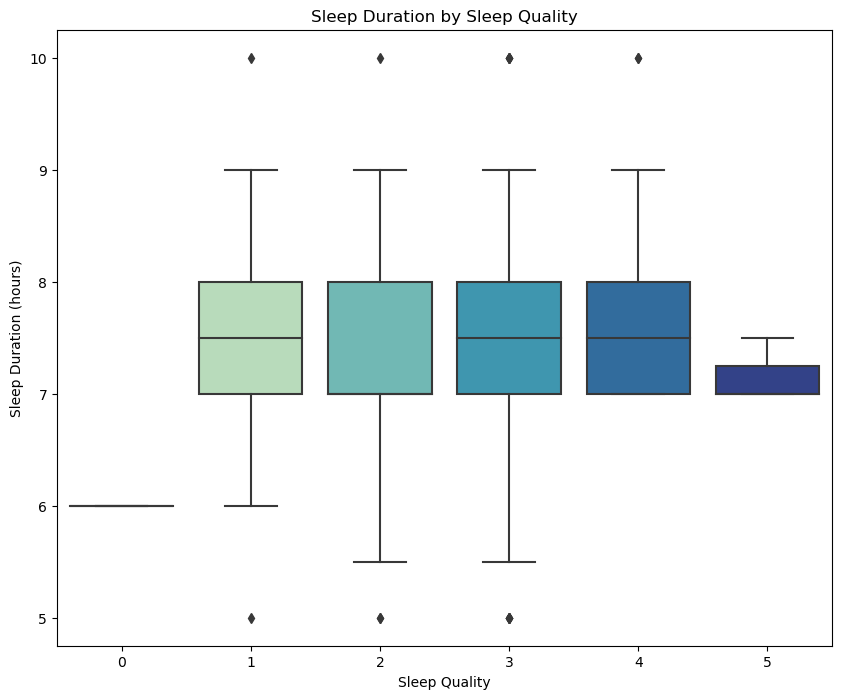

In [25]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='sleep_quality', y='sleep_duration', data=sleep_df, palette='YlGnBu')
plt.title('Sleep Duration by Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Sleep Duration (hours)')
plt.show()

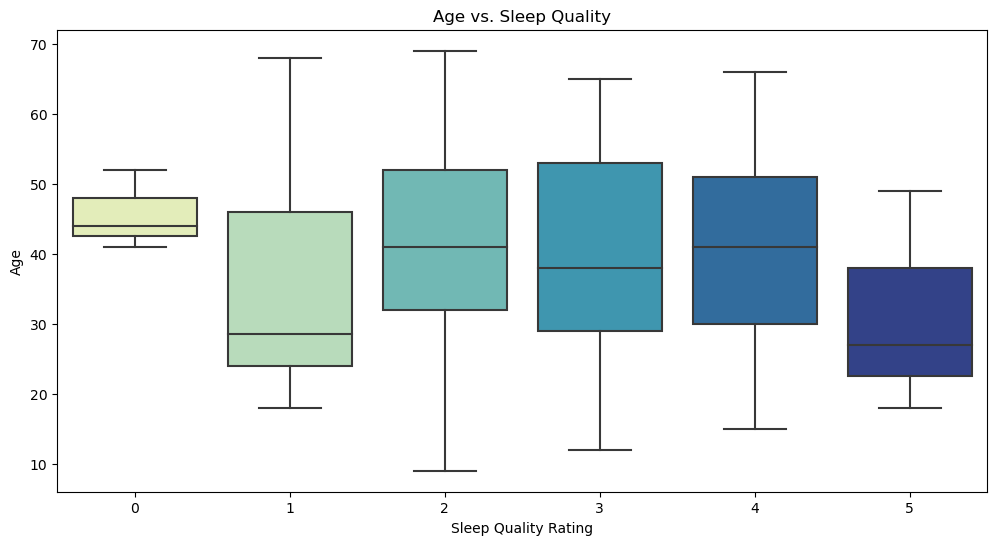

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='sleep_quality', y='age', data=sleep_df, palette='YlGnBu')
plt.title('Age vs. Sleep Quality')
plt.xlabel('Sleep Quality Rating')
plt.ylabel('Age')
plt.show()

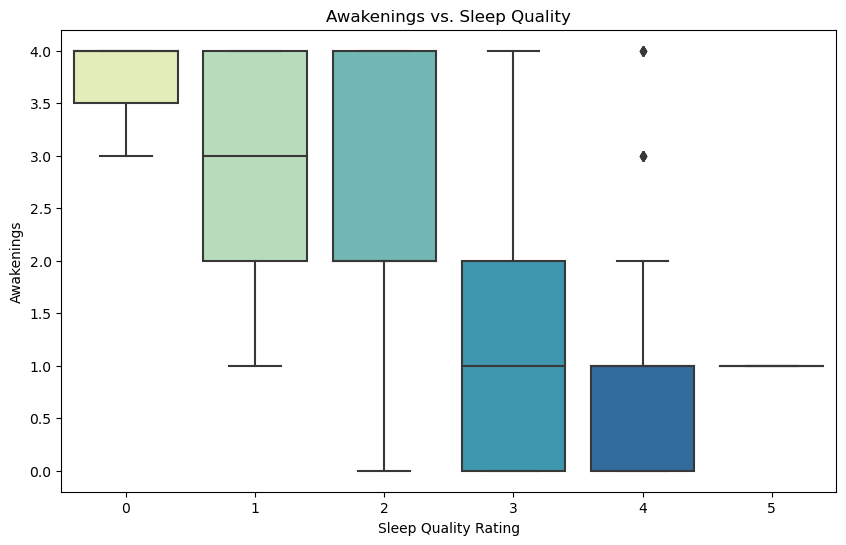

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sleep_quality', y='awakenings', data=sleep_df, palette='YlGnBu')
plt.title('Awakenings vs. Sleep Quality')
plt.xlabel('Sleep Quality Rating')
plt.ylabel('Awakenings')
plt.show()

# Save Data

In [ ]:
# Saving DataFrame to .csv

sleep_df.to_csv('clean_sleep_df.csv', index=False)

In [28]:
clean_sleep_df = pd.read_csv('clean_sleep_df.csv') 

In [ ]:
import pymysql
from sqlalchemy import create_engine
import getpass 

password = getpass.getpass("Please enter the SQL database password: ")
connection_string = 'mysql+pymysql://root:' + password + '@localhost/Ironhack_Mid_Project'
engine = create_engine(connection_string)

connection = engine.connect()

with connection.begin():
    clean_sleep_df.to_sql(name='clean_sleep', con=connection, if_exists='append', index=False)

In [ ]:
# Reading back from SQL

password = getpass.getpass()
query1 = 'SELECT * FROM clean_sleep'
pillow_df_analysis = pd.read_sql_query(query1, engine)
pillow_df_analysis